# Wine Quality Classification: Extending Logistic Regression

##### Minho Song

#### 1. Business Understanding

Wine quality dataset consists of two datasets, red and white vihno verde wine samples for Portugal. The original purpose of the dataset was to set a model for wine quality based on physicochemical tests.<br> 
The task here is to classify wine quality from 0 to 10 based on 11 physicochemical features including acidity, pH, and alcohol.<br><br>
This classification model will help various entities of interest in wine industry from winemakers, wine retailers to end users such as wine enthusiasts or collectors.<br>
For example, this classification model can facilitate quality control in vineyards by ensuring consistency and quality in wine production. Wine retailers can use classification data for wine recommendation or pricing. The end users can make informed decisions about buying new wines based on classification data.<br><br>
The accuracy of wine quality classification should vary depending on where you want to use it.<br> For quality control from wine makers the classifier should perform over 95% accuracy to be successful considering its importance in business. <br> The accuracy required for customer recommendation should be above 85% because this can lead to sales and customer satisfaction.<br>
The personal wine collecting does not require high accuracy from the classification model. The accuracy over 80% should be enough to be successful for this task.


Data Set: Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

### 2. Data Preparation

In [5]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

# fetch dataset 
wine_quality= fetch_ucirepo(id=186) 

# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

##### 2.1 Data pre-processing

In [6]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0  

In [7]:
# check if there is duplicate data
combined_df = pd.concat([X, y], axis=1)
duplicate_detect = combined_df.duplicated(keep=False)
duplicate_data = combined_df[duplicate_detect]

len(duplicate_data)
print(duplicate_data)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.70         0.00             1.9      0.076   
9               7.5              0.50         0.36             6.1      0.071   
11              7.5              0.50         0.36             6.1      0.071   
22              7.9              0.43         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
6450            6.4              0.33         0.44             8.9      0.055   
6454            7.1              0.23         0.39            13.7      0.058   
6455            7.1              0.23         0.39            13.7      0.058   
6478            6.6              0.34         0.40             8.1      0.046   
6479            6.6              0.34         0.40             8.1      0.046   

      free_sulfur_dioxide  

There are 2172 duplicate data entry.<br>
The task of this classification is based on the numeric values of the features and the same feature results in the same quality score.<br>
In order to keep the data integrity and reduce the computational cost, I decided to remove the duplicate values.

In [8]:
#drop duplicates
unique_df = combined_df.drop_duplicates()

# divide the data from the target in the dataset
X = unique_df.drop(columns=['quality'])
y = unique_df['quality']

print(y.info(),'\n')
print('Cleaned data X:\n',X.head())


<class 'pandas.core.series.Series'>
Index: 5318 entries, 0 to 6496
Series name: quality
Non-Null Count  Dtype
--------------  -----
5318 non-null   int64
dtypes: int64(1)
memory usage: 83.1 KB
None 

Cleaned data X:
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 

The cleaned dataset has 5,318 data.<br>
All features have float values, and the target has integer values.<br>
There are no missing values based on the dataframe information.<br>
We could use mean or median imputation if there were missing values in the dataset.

In [9]:
# variable description
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


##### 2.2 Dimensionality Reduction with PCA

In [10]:
# Standardize the data with scaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Perform dimesionality reduction with PCA
pca = PCA(n_components=5)
pca.fit(scaled_X)
X_pca = pca.transform(scaled_X)

for i, component in enumerate(pca.components_):
    print(f"PC{i+1} : {component}")

PC1 : [-0.2745507  -0.38961733  0.13432128  0.2979616  -0.31935943  0.42583683
  0.47636849 -0.13612026 -0.18814454 -0.31741526 -0.03260366]
PC2 : [ 0.30688241  0.0698779   0.21915996  0.3676976   0.27508761  0.14094443
  0.16173539  0.56525233 -0.18707166  0.15801436 -0.46533456]
PC3 : [ 0.42384393 -0.31199606  0.57718466 -0.17304227 -0.0084823  -0.13828438
 -0.1157912  -0.18433723 -0.46443531  0.07415932  0.2686018 ]
PC4 : [-0.19468845 -0.23218441  0.24903651 -0.18583638  0.29124341  0.33512112
  0.19781739 -0.09317784  0.39471614  0.63420814  0.09310721]
PC5 : [ 0.15858824 -0.11163955  0.16615756  0.39815316 -0.57357391 -0.17106929
 -0.12865667  0.29725541  0.44715799  0.17649224  0.28633421]


##### 2.3 Cross validation (for-against 80-20 split)

In [11]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, train_size = 0.8, test_size=0.2)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)
print(np.hstack((lr.intercept_[:,np.newaxis],lr.coef_)))

# Cross validation
ss = ShuffleSplit(10, test_size= 0.2)
cv_accuracy = cross_val_score(lr, X_pca, y, cv=ss, scoring="accuracy")

print('Logistics Regression Accuracy: ', accuracy_score(y_test,yhat))
print(f'Cross validation: {cv_accuracy}')

[[-5.18008158 -0.06478225  0.30950317 -0.2667611  -0.18388989 -0.30321604]
 [-3.40949523 -0.18877996 -0.05323552 -0.1341398  -0.56256704 -0.26720335]
 [-0.8536028  -0.10576225  0.46475236 -0.34408159 -0.30920475 -0.526021  ]
 [-0.28356419  0.09068998 -0.05408522  0.10155403  0.09532317  0.15488846]
 [-2.04557342  0.13803662 -0.53540423  0.42714985  0.30271089  0.73902287]
 [-4.28505292  0.39117807 -0.56445088  0.38683314  0.18903836  0.91424044]
 [-6.29523831  0.04288794 -0.30700153  0.15878089  0.11494465  0.31238573]]
Logistics Regression Accuracy:  0.549812030075188
Cross validation: [0.51973684 0.53289474 0.51033835 0.53759398 0.51221805 0.52161654
 0.48590226 0.51597744 0.52161654 0.50093985]
CPU times: total: 562 ms
Wall time: 241 ms


The ShuffleSplit cross validation strategy shows that the the size of test data being 0.2 gives somewhat stable accuracies during 10 iterations. <br>

The single train-test split and the cross-validation are relatively close in terms of accuracy.<br>

Therefore, I will continue using 80-20 data split for the rest of the assignment based on its consistency shown in the cross-validation.

### 3.Modeling

##### 3.1 Implement Logistic regression

##### 3.1.1 Implement BinaryLogisticRegression class with customized gradient calculation

In [12]:
from scipy.special import expit
from scipy.optimize import fmin_bfgs 
from numpy import ma

class BinaryLogisticRegression:
    def __init__(self, eta, penalty=None, iterations=20, C=0.001, l1_ratio=0.5):
        self.eta = eta
        self.penalty = penalty
        self.iters = iterations
        self.C = C
        self.l1_ratio = l1_ratio
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    def _custom_regularization(self, gradient):
        # custom regularization
        if self.penalty is not None:
            if self.penalty == 'l1':
                gradient[1:] += -self.C*np.sign(self.w_[1:])
            elif self.penalty == 'l2':
                gradient[1:] += -2 * self.w_[1:] * self.C
            elif self.penalty == 'elasticnet':
                gradient[1:] += -self.C * (self.l1_ratio*np.sign(self.w_[1:]) + (1-self.l1_ratio)*2*self.w_[1:])
            else:
                raise ValueError("choose either 'l1','l2','elasticnet' or leave None for No regularization")
        return  gradient

    # vectorized gradient calculation with regularization using L2 Norm
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        return self._custom_regularization(gradient)

    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 
            # add bacause maximizing 

Customizable regularization is implemented in BinaryLogisticRegression class, the parrent class.<br>
This is because MulticlassLogisticRegression does not override get_gradient function for gradient calculation and relies on parent classes for the function.<br>


##### 3.1.2 SteepestAscentLogisticRegression

In [13]:
class SteepestAscentLogisticRegression(BinaryLogisticRegression):
    def fit(self, X, y):
            Xb = self._add_bias(X)  # add bias term
            num_samples, num_features = Xb.shape
            
            self.w_ = np.zeros((num_features, 1))  # initialize weight vector to zeros
            
            for _ in range(self.iters):
                gradient = self._get_gradient(Xb, y)
                self.w_ += gradient * self.eta  # update weights using gradient ascent (positive direction)

As SteepestAscent is not provided in the template, I added a new class to make the assignment requirements are met.<br><br>
I did not know what Steepest ascent meant, so I got help from generative AI for knowledge and implementation. <br>Steepest ascent is used for an objective function that requires maximizaion.
<br>


##### 3.1.3 StochasticLogisticRegression

In [14]:
class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        
        # grab a subset of samples in a mini-batch
        # and calculate the gradient according to the small batch only
        mini_batch_size = 16
        idxs = np.random.choice(len(y), mini_batch_size)
        
        ydiff = y[idxs]-self.predict_proba(X[idxs],add_bias=False).ravel() # get y difference (now scalar)
        gradient = np.mean(X[idxs] * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)

        return  self._custom_regularization(gradient)
        

##### 3.1.4 HessianBinaryLogisticRegression(Newton's Update Method)

In [15]:
from numpy.linalg import pinv

class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        return pinv(hessian) @ self._custom_regularization(gradient)
       

##### 3.1.5 BFGSBinaryLogisticRegression(Quasi-Newton)

In [16]:
class BFGSBinaryLogisticRegression(BinaryLogisticRegression):
    
    @staticmethod
    def objective_function(w,X,y,C,penalty,l1_ratio):
        g = expit(X @ w)
        # invert this because scipy minimizes, but we derived all formulas for maximzing
        return -ma.sum(ma.log(g[y==1]))-ma.sum(ma.log(1-g[y==0])) + C*sum(w**2) 
        #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))

    @staticmethod
    def objective_gradient(w,X,y,C,penalty,l1_ratio):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        # applying custom regularization
        if penalty is not None:
            if penalty == 'l1':
                gradient[1:] += -C * np.sign(w[1:])
            elif penalty == 'l2':
                gradient[1:] += -2 * C * w[1:]
            elif penalty == 'elasticnet':
                gradient[1:] += -C * (l1_ratio * np.sign(w[1:]) + (1 - l1_ratio) * 2 * w[1:])
            else:
                raise ValueError("Choose either 'l1', 'l2', 'elasticnet' or leave None for no regularization")
        return -gradient
    
    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C, self.penalty, self.l1_ratio), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
        self.w_ = self.w_.reshape((num_features,1))

##### 3.1.6 MultiClassLogisticRegression with Optimization techniques.

In [17]:
class MultiClassLogisticRegression:
    solvers={
        None: BFGSBinaryLogisticRegression,
        "hessian":HessianBinaryLogisticRegression,
        "stochastic":StochasticLogisticRegression,
        "steepest":SteepestAscentLogisticRegression,
    }
    def __init__(self, eta, iterations=20, 
                 C=0.0001, 
                 solver=None):
        self.eta = eta
        self.iters = iterations
        self.C = C
        # custom optimization technique with instantiation
        if solver not in self.solvers:
            raise ValueError("choose either 'hessian','stochastic','steepest' or leave None for BFGSBinaryLogisticRegression")
        self.solver = self.solvers[solver]
        
        self.classifiers_ = []
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.array(y==yval).astype(int) # create a binary problem
            # train the binary classifier for this class
            
            hblr = self.solver(eta=self.eta,iterations=self.iters,C=self.C)
            hblr.fit(X,y_binary)

            # add the trained classifier to the list
            self.classifiers_.append(hblr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for hblr in self.classifiers_:
            probs.append(hblr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

##### 3.2 Visualize Performance of the classifier

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, train_size = 0.8, test_size=0.2)

# Define the parameter range
param_range = {'C': [10**i for i in range(-4, 5)],
              'solver':[None,"hessian","stochastic","steepest"]
              }  # C values from 10^-4 to 10^4, 4 solvers


##### 3.2.1 Exhaustive search for best C and solver

In [107]:
from sklearn import metrics as mt
import time
# Initialize logistic regression model
bl = BinaryLogisticRegression(eta=0.1, penalty='l2',iterations= 20, C=0.001)

results, c_values, solvers, timers = [], [], [], []

for C in param_range['C']:
    for solver in param_range['solver']:
        start_time = time.time()
        
        mclr = MultiClassLogisticRegression(eta= 0.1, C=C,solver=solver, iterations=140)
        
        mclr.fit(X_train,y_train)  # train object
        y_hat = mclr.predict(X_test) # get test set precitions
        accuracy = mt.accuracy_score(y_test,y_hat) # calculate accuracy
        
        end_time = time.time()
        iteration_time = end_time - start_time
        
        # Save the results
        solvers.append(solver)
        c_values.append(C)
        results.append(accuracy)
        timers.append(iteration_time)
        
        # print the accuracy and time taken 
        print(f'Optimization technique:{solver} C: {C}, test_accuracy: {accuracy:.4f}, time takne: {iteration_time:.5f}')
    print('\n') 


Optimization technique:None C: 0.0001, test_accuracy: 0.5122, time takne: 0.08600
Optimization technique:hessian C: 0.0001, test_accuracy: 0.5132, time takne: 31.50100
Optimization technique:stochastic C: 0.0001, test_accuracy: 0.5028, time takne: 0.06400
Optimization technique:steepest C: 0.0001, test_accuracy: 0.5028, time takne: 0.22100


Optimization technique:None C: 0.001, test_accuracy: 0.5122, time takne: 0.08100
Optimization technique:hessian C: 0.001, test_accuracy: 0.5132, time takne: 32.36000
Optimization technique:stochastic C: 0.001, test_accuracy: 0.5141, time takne: 0.07000
Optimization technique:steepest C: 0.001, test_accuracy: 0.5028, time takne: 0.21800


Optimization technique:None C: 0.01, test_accuracy: 0.5122, time takne: 0.07300
Optimization technique:hessian C: 0.01, test_accuracy: 0.5132, time takne: 32.64300
Optimization technique:stochastic C: 0.01, test_accuracy: 0.5038, time takne: 0.06800
Optimization technique:steepest C: 0.01, test_accuracy: 0.5028, ti

This method of exhaustive iterations with C and solvers is more likely to have data snooping due to lack of cross-validation and the direct use of test set for hyperparameter tuning.<br>


       solver       C  accuracy
0        None  0.0001  0.512218
1     hessian  0.0001  0.513158
2  stochastic  0.0001  0.502820
3    steepest  0.0001  0.502820
4        None  0.0010  0.512218
       solver       C      timer
0        None  0.0001   0.085998
1     hessian  0.0001  31.500998
2  stochastic  0.0001   0.063999
3    steepest  0.0001   0.221000
4        None  0.0010   0.081004


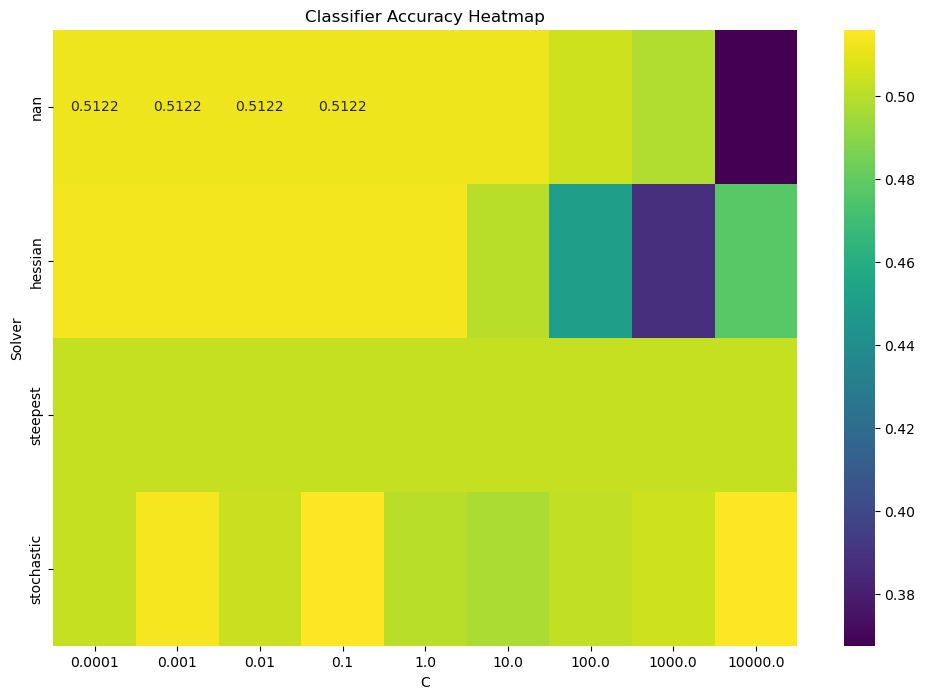

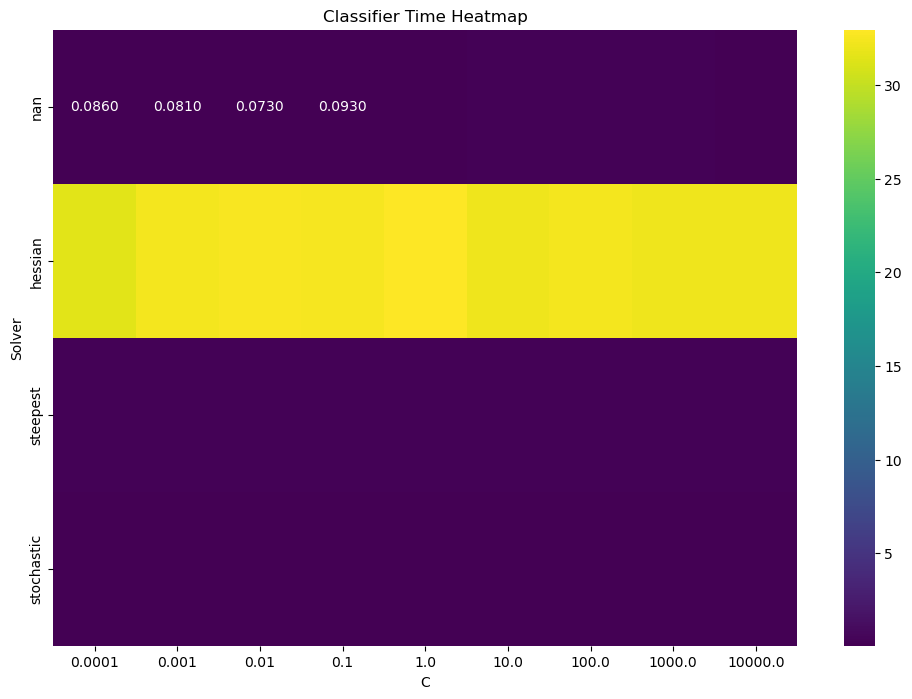

In [108]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# build new dataset for visualization
results_df = pd.DataFrame({
    'solver': solvers,
    'C':c_values,
    'accuracy':results,
})

timers_df = pd.DataFrame({
    'solver': solvers,
    'C':c_values,
    'timer':timers,})

pivot_table_ac = results_df.pivot(index='solver', columns='C', values='accuracy')
pivot_table_t = timers_df.pivot(index='solver', columns='C', values='timer')

print(results_df.head())
print(timers_df.head())

# Plot a heatmap for accuracy and time each with respect to C and solver 
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_ac, annot=True, fmt=".4f", cmap='viridis')
plt.title('Classifier Accuracy Heatmap')
plt.xlabel('C')
plt.ylabel('Solver')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_t, annot=True, fmt=".4f", cmap='viridis')
plt.title('Classifier Time Heatmap')
plt.xlabel('C')
plt.ylabel('Solver')
plt.show()


The heatmap shows that the lower C values perform better in most of the optimization techniques. None(BFGSBinaryLogisticRegression) and hessian(HessianBinaryLogisticRegression) perform better in C range between 10^-4 and 10^0.
In terms of time, hessian(HessianBinaryLogisticRegression) takes exceptionally longer than other model.

Next is where c value changes with cross-validation, visualizing the results with a box plot.

In [109]:
num_cv_iterations = 20
y_np = y.to_numpy()
X_np = X.to_numpy()
num_instances = len(y_np)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

def mclr_explor(C):
    mclr = MultiClassLogisticRegression(eta= 0.1, C=C,solver=solver, iterations=140) # get object
    acc = []
    for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X_np,y_np)):
        mclr.fit(X_np[train_indices],y_np[train_indices])  # train object
        y_hat = mclr.predict(X_np[test_indices]) # get test set predictions
        acc.append(mt.accuracy_score(y_np[test_indices],y_hat))
        
    acc = np.array(acc)
    return acc

costs = np.logspace(-5,1,20)
accs = []
for c in costs:
    accs.append(mclr_explor(c))
    

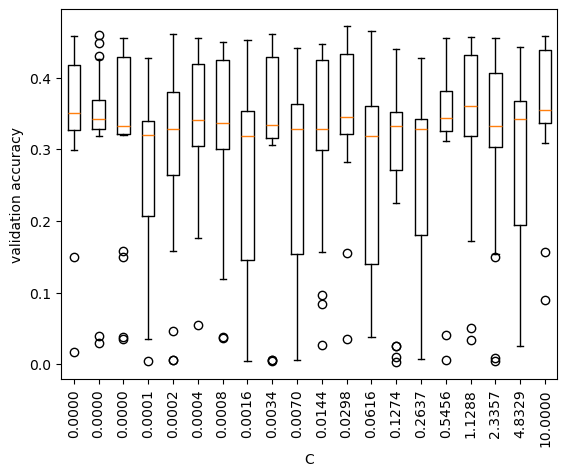

In [110]:
# a boxplot of the data across c
from matplotlib import pyplot as plt
%matplotlib inline

plt.boxplot(accs)
plt.xticks(range(1,len(costs)+1),['%.4f'%(c) for c in costs],rotation='vertical')
plt.xlabel('C')
plt.ylabel('validation accuracy')
plt.show()

There are many outliers in the box plot.<br>
However, overall accuracies are relatively stable.

##### 3.2.2 Comparision between custom logistic regression model and scikit model

In [111]:
#converting the results to numpy arrays
solvers= np.array(solvers)
c_values= np.array(c_values)
results = np.array(results)
timers = np.array(timers)

# Find the best performance
best_idx = np.argmax(results)
best_c = c_values[best_idx]
best_solver = solvers[best_idx]
best_accuracy= results[best_idx]
best_time = timers[best_idx]

print(f"\nBest C: {best_c}")
print(f"Best solver: {best_solver}")
print(f"Best accuracy: {best_accuracy:.4f}")
print(f"Best timer: {best_time:.4f}")



Best C: 0.1
Best solver: stochastic
Best accuracy: 0.5160
Best timer: 0.0770


In [113]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, train_size = 0.8, test_size=0.2)

lr = LogisticRegression(solver='sag', C=0.1, penalty='l2', max_iter=140)
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)
print(np.hstack((lr.intercept_[:,np.newaxis],lr.coef_)))

# Cross validation
ss = ShuffleSplit(10, test_size= 0.2)
cv_accuracy = cross_val_score(lr, X_pca, y, cv=ss, scoring="accuracy")
mean_cv_accuracy = np.mean(cv_accuracy)

print('Logistics Regression Accuracy: ', accuracy_score(y_test,yhat) )
print(f'Cross validation: {mean_cv_accuracy}')

[[-1.76365428 -0.19536067  0.458616   -0.36747584 -0.04429576 -0.46516796]
 [ 0.02968218 -0.28257259  0.19089221 -0.23230076 -0.52857411 -0.53182772]
 [ 2.23927128 -0.1227787   0.4802537  -0.29425813 -0.2175794  -0.54273091]
 [ 2.69819186 -0.00378957  0.09654811  0.00875448  0.14153297 -0.07316685]
 [ 1.20503849  0.08375526 -0.3464468   0.38119799  0.34929565  0.50287669]
 [-0.89013883  0.38894582 -0.56360198  0.30804201  0.23374837  0.82382375]
 [-3.51839069  0.13180045 -0.31626123  0.19604025  0.06587228  0.28619299]]
Logistics Regression Accuracy:  0.5018796992481203
Cross validation: 0.5176691729323308
CPU times: total: 1.23 s
Wall time: 1.5 s


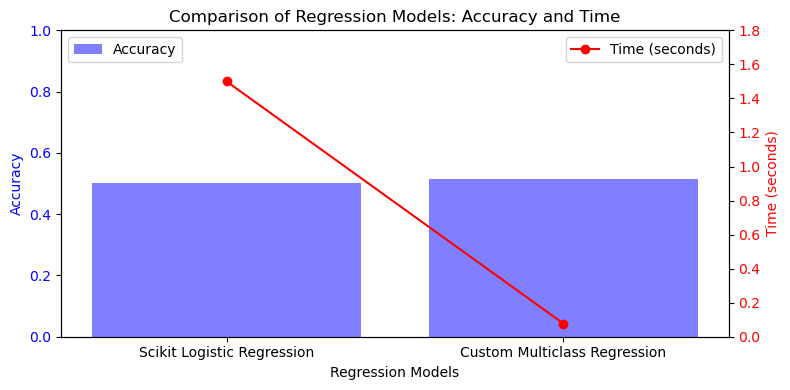

In [153]:
models = ['Scikit Logistic Regression', 'Custom Multiclass Regression']
accuracies = [0.5018 ,0.5160]
times = [1.5, 0.077 ]

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plotting bars for accuracy
ax1.bar(models, accuracies, color='b', alpha=0.5, label='Accuracy')

# Adding labels and title
ax1.set_xlabel('Regression Models')
ax1.set_ylabel('Accuracy', color='b')
ax1.set_title('Comparison of Regression Models: Accuracy and Time')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(0, 1)  # Ensure accuracy axis range from 0 to 1

# Create second y-axis for time (line chart)
ax2 = ax1.twinx()
ax2.plot(models, times, color='r', marker='o', label='Time (seconds)')
ax2.set_ylabel('Time (seconds)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, max(times) * 1.2)  # Adjust range for time axis

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

The best logistic regression was with stochastic logistic regression solver where c is 0.1, 140 iterations, and l2 regularization.<br>
The results are C: 0.1, solver: stochastic, accuracy: 0.5160, time: 0.0770s.<br>
The logistic regression with stochastic average gradient where c is 0.1, 140 max iterations, and l2 regularization.<br>
The results are 0.5018 of accuracy and 1.5s.<br><br>
According to the results, the custom implementation of regression model performs better than scikit-learn.<br><br>

However,scikit-learn implementation is easier to implement and maintain, and it offers other features and functionalities.<br>
In addition, the performance was not consistently exceeding scikit-learn model's results. 






### 4. Exceptional Work

 Gradient Calculation of MSE = ∇wMSE(w) = -mean(2(y 
i −g(w 
T
 x 
i
​
 ))g 
′
 (w 
T
 x 
i
​
 )x 
i
​)
, 
where σ 
′
 (⋅) is the derivative of the sigmoid function, 
g
′
 (⋅)=g(⋅)(1−g(⋅))

In [144]:
class MSE_HessianLogisticRegression(BinaryLogisticRegression):

    # vectorized gradient calculation with MSE
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel()
        ydiff = np.array(y-g) # get y difference
        
        # Gradient of MSE
        gradient = -np.mean((2*ydiff*g*(1-g))[:,np.newaxis]*X, axis=0)
        
        # Hessian function 
        hessian = X.T @ np.diag(g*(1-g)*(1-2*g)) @ X / X.shape[0]
        
        gradient = gradient.reshape(self.w_.shape)
        
        return pinv(hessian) @ self._custom_regularization(gradient)

In [145]:
class MultiClassLogisticRegression:
    # Added MSE_HessianLogisticRegression class as one of the solvers
    solvers={
        None: BFGSBinaryLogisticRegression,
        "hessian":HessianBinaryLogisticRegression,
        "stochastic":StochasticLogisticRegression,
        "steepest":SteepestAscentLogisticRegression,
        "mse": MSE_HessianLogisticRegression,
    }
    def __init__(self, eta, iterations=20, 
                 C=0.0001, 
                 solver=None):
        self.eta = eta
        self.iters = iterations
        self.C = C
        # custom optimization technique with instantiation
        if solver not in self.solvers:
            raise ValueError("choose either 'hessian','stochastic','steepest' or leave None for BFGSBinaryLogisticRegression")
        self.solver = self.solvers[solver]
        
        self.classifiers_ = []
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.array(y==yval).astype(int) # create a binary problem
            # train the binary classifier for this class
            
            hblr = self.solver(eta=self.eta,iterations=self.iters,C=self.C)
            hblr.fit(X,y_binary)

            # add the trained classifier to the list
            self.classifiers_.append(hblr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for hblr in self.classifiers_:
            probs.append(hblr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

In [150]:
%%time
mselr = MultiClassLogisticRegression(eta=0.1, iterations=140, C=0.1, solver="mse")
mselr.fit(X_train, y_train)
y_pred = mselr.predict(X_train)

y_hat = mclr.predict(X_test) # get test set precitions
accuracy = mt.accuracy_score(y_test,y_hat) # calculate accuracy

print(f"The accuracy of MSE_Hessian Logistic Regression: {accuracy}")

The accuracy of MSE_Hessian Logistic Regression: 0.4943609022556391
CPU times: total: 2min 21s
Wall time: 33.6 s


Based on the result of using hessian method between MLE and MSE, time taken for the running the models and accuracy do not differ significantly<br>
I assumed that the more classes there are in multiclass regression, the more likely the outcome will look like the one from linear regression<br>
MSE was used for linear regression model and MLE was used for logistic regression model in the class.<br>
The reason of applying MSE for multiclass regression is attributed to the characteristic of multiclass regression that resembles both regression models.<br>
For this classification task, the number of classes is 11(0-10) and does not large enough for the model to work like linear regression.<br>
The results of running the model with MSE do not exceed other models with MLE.<br>
Therfore, I prefer using MLE for the task.


# Reference

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.